In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import os
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Visiualizing high-dimensional data with PCA

In [2]:
x = np.array([
    [2, 0, -1.4],
    [2.2, 0.2, -1.5],
    [2.4, 0.1, -1],
    [1.9, 0, -1.2]
])

In [9]:
np.cov(x, rowvar=False)

array([[ 0.04916667,  0.01416667,  0.01916667],
       [ 0.01416667,  0.00916667, -0.00583333],
       [ 0.01916667, -0.00583333,  0.04916667]])

In [28]:
x = np.array([
    [0.9, 1], [2.4, 2.6], [1.2, 1.7], [0.5, 0.7], [0.3, 0.7], [1.8, 1.4],
    [0.5, 0.6], [0.3, 0.6],[2.5, 2.6], [1.3, 1.1]
])
x

array([[ 0.9,  1. ],
       [ 2.4,  2.6],
       [ 1.2,  1.7],
       [ 0.5,  0.7],
       [ 0.3,  0.7],
       [ 1.8,  1.4],
       [ 0.5,  0.6],
       [ 0.3,  0.6],
       [ 2.5,  2.6],
       [ 1.3,  1.1]])

In [20]:
x2 = x - np.array([1.17, 1.3])
x2

array([[-0.27, -0.3 ],
       [ 1.23,  1.3 ],
       [ 0.03,  0.4 ],
       [-0.67, -0.6 ],
       [-0.87, -0.6 ],
       [ 0.63,  0.1 ],
       [-0.67, -0.7 ],
       [-0.87, -0.7 ],
       [ 1.33,  1.3 ],
       [ 0.13, -0.2 ]])

In [24]:
x3 = np.cov(x, rowvar=False ) # 计算协方差
x3

array([[ 0.68677778,  0.60666667],
       [ 0.60666667,  0.59777778]])

In [37]:
w, v = np.linalg.eig( x3 )
print(w)
print(v)

[ 1.25057433  0.03398123]
[[ 0.73251454 -0.68075138]
 [ 0.68075138  0.73251454]]


In [53]:
np.dot(x2, v[:, 0].reshape(2, -1) )

array([[-0.40200434],
       [ 1.78596968],
       [ 0.29427599],
       [-0.89923557],
       [-1.04573848],
       [ 0.5295593 ],
       [-0.96731071],
       [-1.11381362],
       [ 1.85922114],
       [-0.04092339]])

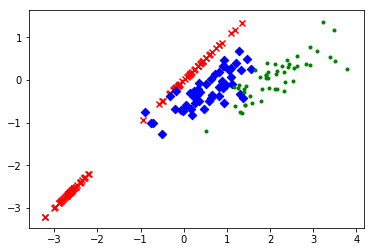

In [58]:
data = load_iris()
y = data.target
x = data.data
pca = PCA( n_components=2 )
reduced_x = pca.fit_transform(x)
red_x = red_y = []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range( len(reduced_x) ):
    if y[i] == 0:
        red_x.append( reduced_x[i][0] )
        red_y.append( reduced_x[i][1] )
    elif y[i] == 1:
        blue_x.append( reduced_x[i][0] )
        blue_y.append( reduced_x[i][1] )
    else:
        green_x.append( reduced_x[i][0] )
        green_y.append( reduced_x[i][1] )

plt.scatter( red_x, red_y, c='r', marker='x' )
plt.scatter( blue_x, blue_y, c='b', marker='D' )
plt.scatter( green_x, green_y, c='g', marker='.' )
plt.show()

## face recognition with PCA

In [62]:
x, y = [], []
for dirpath, _, filenames in os.walk( 'E:\\MySQL_data\\orl_faces'):
    for filename in filenames:
        if filename[-3:] == 'pgm':
            img = Image.open( os.path.join( dirpath, filename)).convert('L')
            arr = np.array(img).reshape(10304).astype('float32') / 255.
            x.append( arr)
            y.append( dirpath )

In [63]:
x = scale(x)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
pca = PCA(n_components=150)

In [ ]:
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)
print( x_train.shape )
print( x_train_reduced.shape )
lgr = LogisticRegression()
accuracies = cross_val_score( lgr, x_train_reduced, y_train )
print( 'Cross validation accuracy: {}'.format(accuracies.mean()) )

In [67]:
lgr.fit( x_train_reduced, y_train )
predictions = lgr.predict( x_test_reduced )
print( classification_report(y_test, predictions) )

                             precision    recall  f1-score   support

 E:\MySQL_data\orl_faces\s1       1.00      1.00      1.00         2
E:\MySQL_data\orl_faces\s10       1.00      1.00      1.00         4
E:\MySQL_data\orl_faces\s11       1.00      1.00      1.00         1
E:\MySQL_data\orl_faces\s13       1.00      1.00      1.00         4
E:\MySQL_data\orl_faces\s14       1.00      1.00      1.00         2
E:\MySQL_data\orl_faces\s15       1.00      1.00      1.00         2
E:\MySQL_data\orl_faces\s16       1.00      0.60      0.75         5
E:\MySQL_data\orl_faces\s17       1.00      1.00      1.00         1
E:\MySQL_data\orl_faces\s18       1.00      1.00      1.00         2
E:\MySQL_data\orl_faces\s19       1.00      1.00      1.00         2
 E:\MySQL_data\orl_faces\s2       1.00      1.00      1.00         3
E:\MySQL_data\orl_faces\s20       1.00      1.00      1.00         5
E:\MySQL_data\orl_faces\s21       1.00      1.00      1.00         3
E:\MySQL_data\orl_faces\s22      